# Start by importing the **JsonMidiCreator** library

In [1]:
import sys, os
project_root = os.path.abspath(os.path.join(os.getcwd(), "../../"))  # You are currently in "/Jupyter/[project]" folder
src_path = os.path.join(project_root, "src")
if src_path not in sys.path:
    sys.path.append(src_path)

from JsonMidiCreator import *

## Write basic Chord progression

Example taken from: https://medium.com/pragmatic-sound/create-an-effective-melody-8ff0a89ab7ba

In [2]:
clip_chords = Chord("A", Scale("minor")) / Chord("F", Scale("Major")) / Chord("C", Scale("Major")) / Chord("G", Scale("Major"))

In [3]:
clip_chords << Foreach(2, 0, 1, 0)**Inversion() << Foreach(1, 2, 2, 2)**Octave()

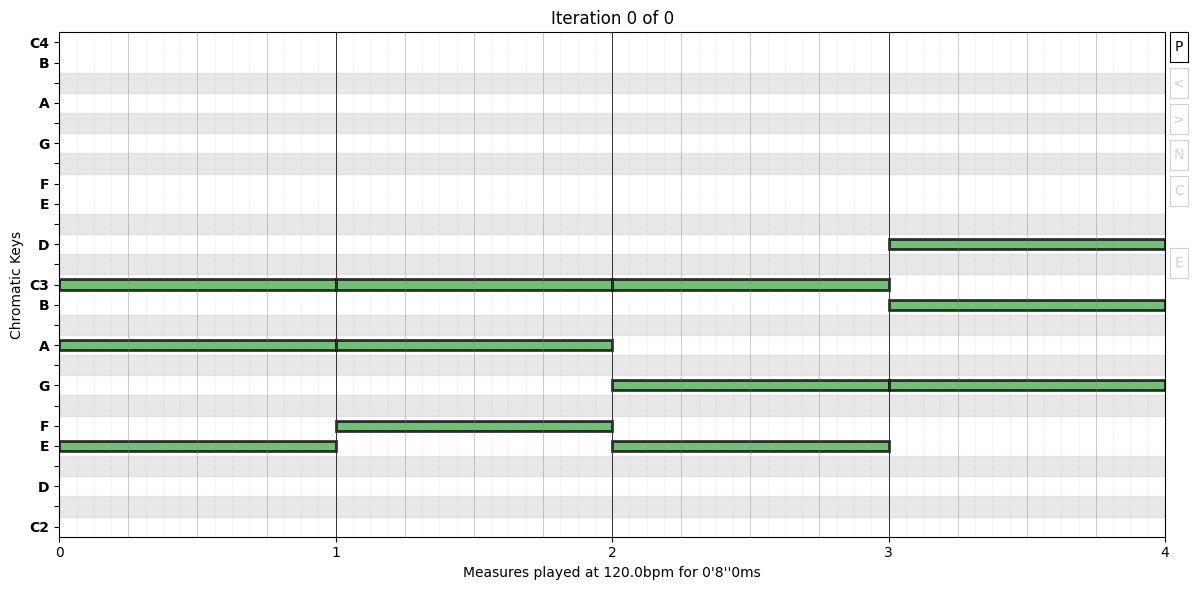

In [4]:
clip_chords >> Plot()

In [5]:
# Here the usage of ~ makes a copy of clip_chords
clip_bass = ~clip_chords << Octave(1) << Size(1) << Inversion(0)

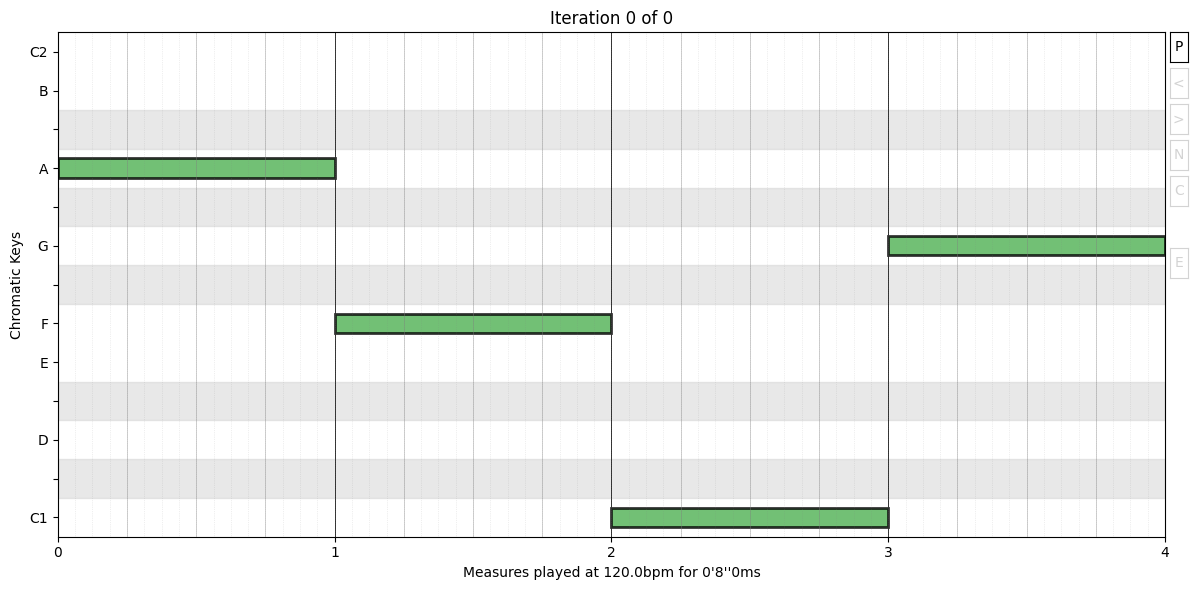

In [6]:
clip_bass >> Plot()

In [7]:
clip_togehter = clip_chords + clip_bass

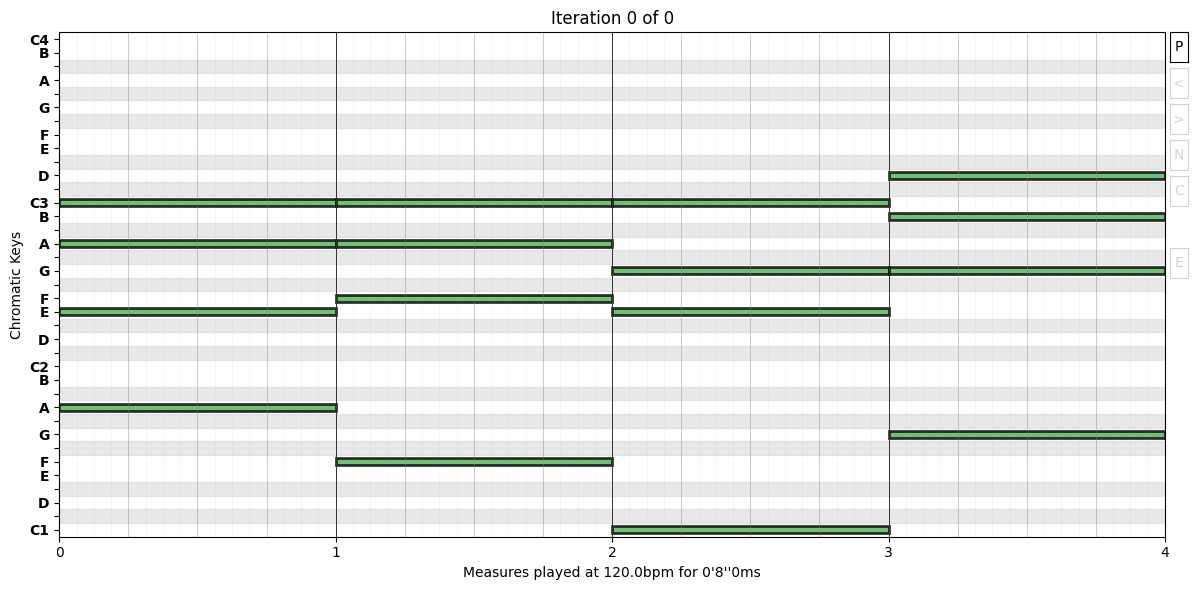

In [8]:
clip_togehter >> Plot()

In [9]:
clip_melody = ~clip_bass << Foreach(3, 3, 4, 3)**Octave()

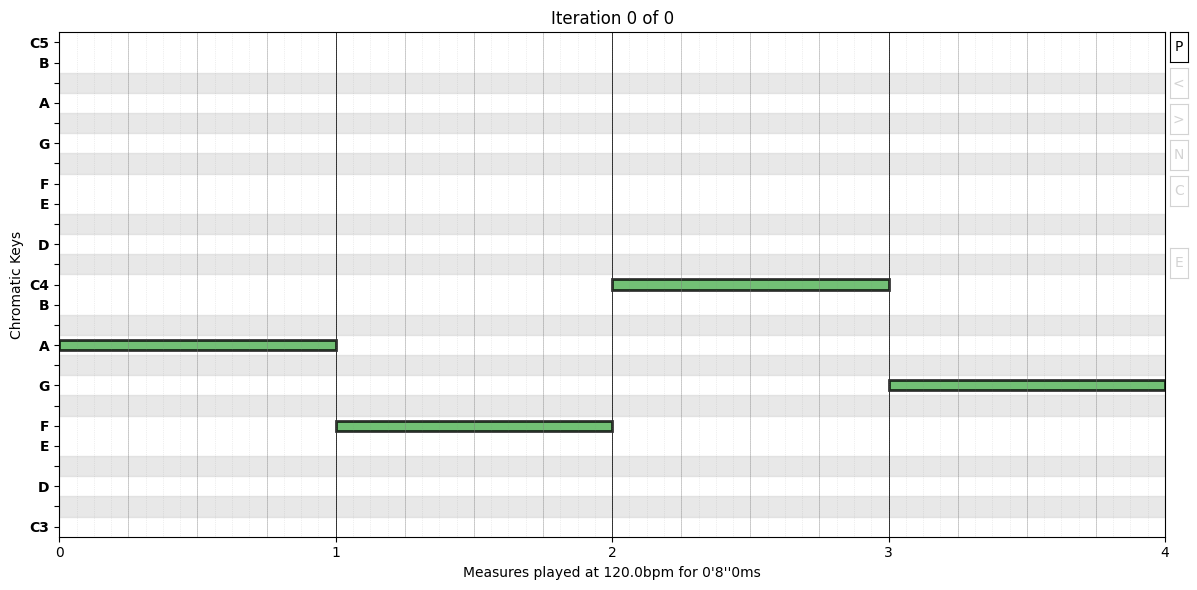

In [10]:
clip_melody >> Plot()

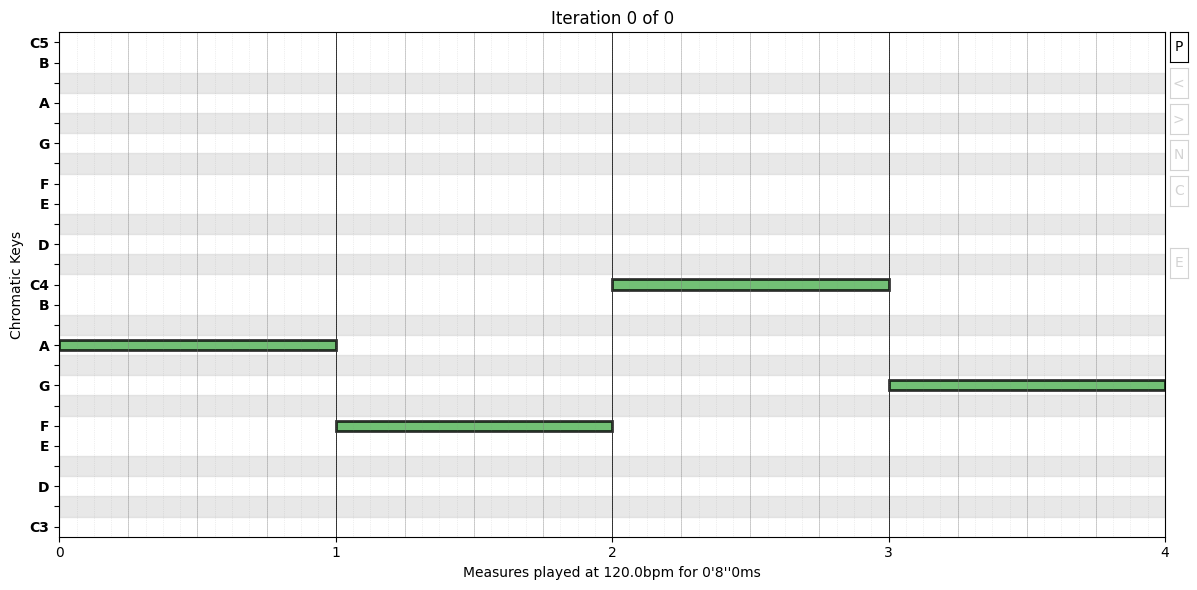

In [11]:
# `decompose` makes all `Chord` elements become a single note each
clip_melody.decompose() >> Plot()

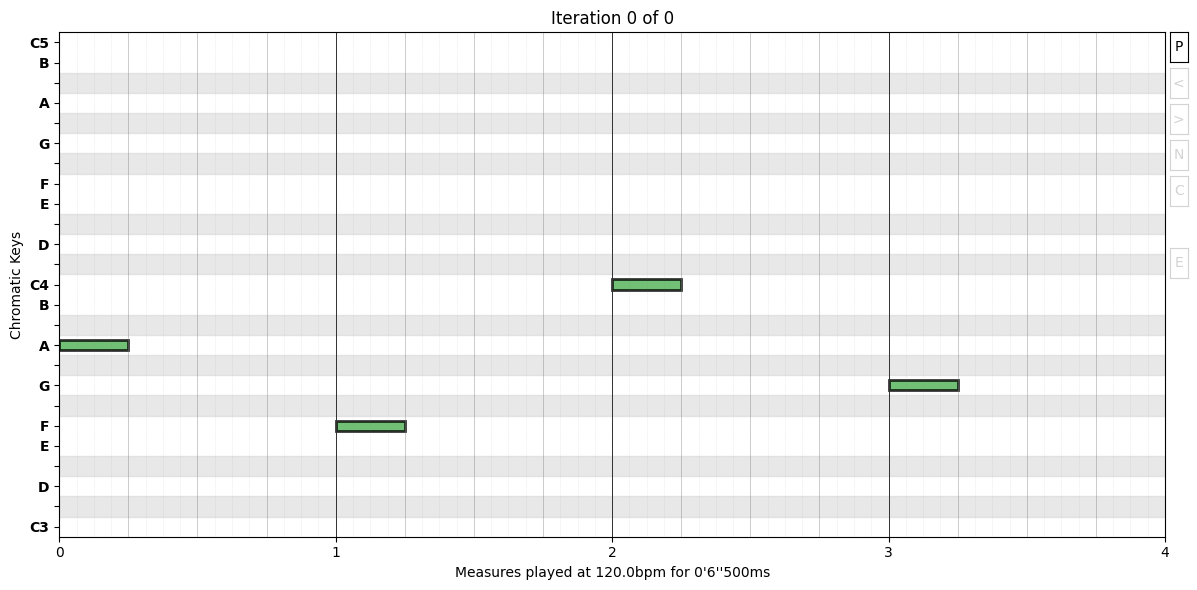

In [12]:
clip_melody / Length(4) >> Plot()

## Developing melody with Frames only

In [13]:
# The operator // on `Length` is the number of divisions, fragments of the resultant `Element` `Length`
framed_melody = clip_melody // Length(4)

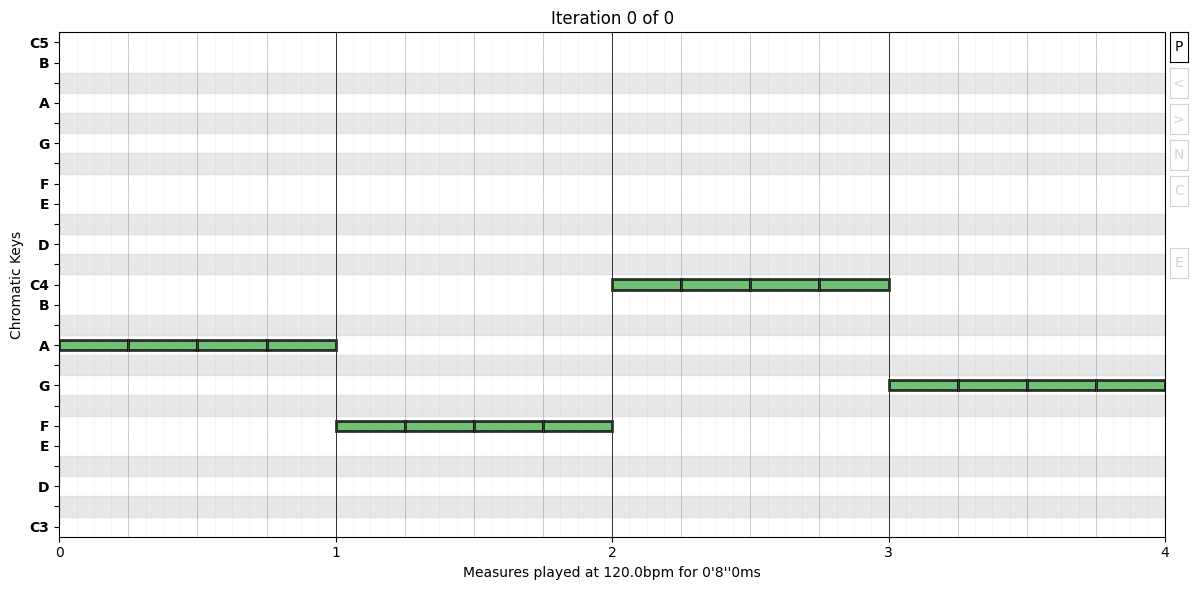

In [14]:
framed_melody >> Plot()

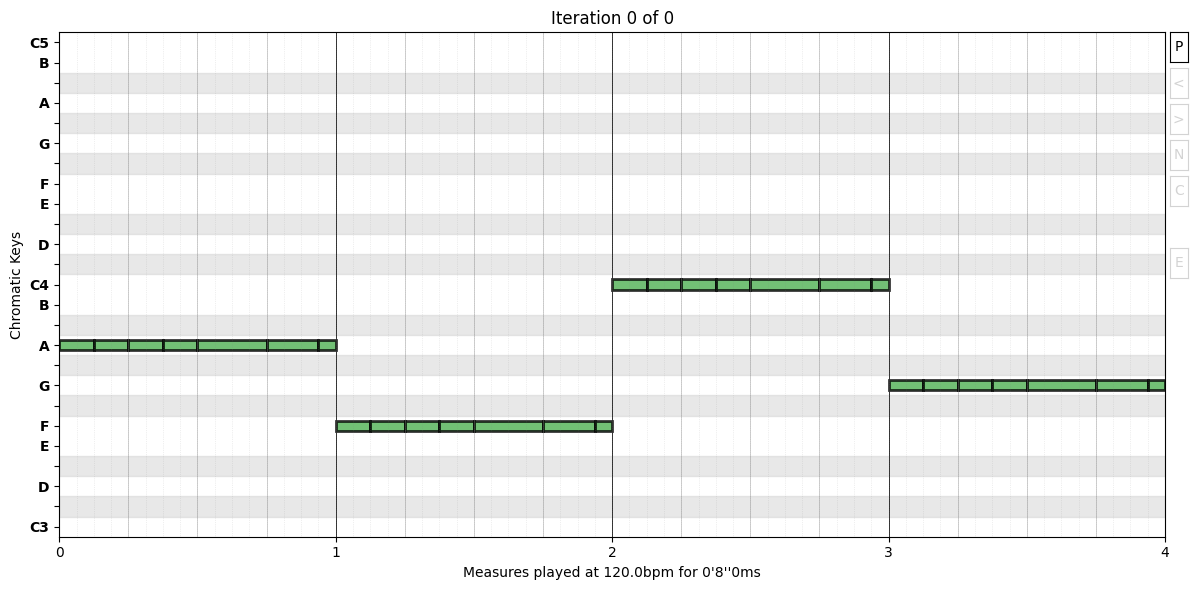

In [15]:
framed_melody //= Less(Beat(2))**Length(2)
framed_melody //= Step(15)
framed_melody >> Plot()

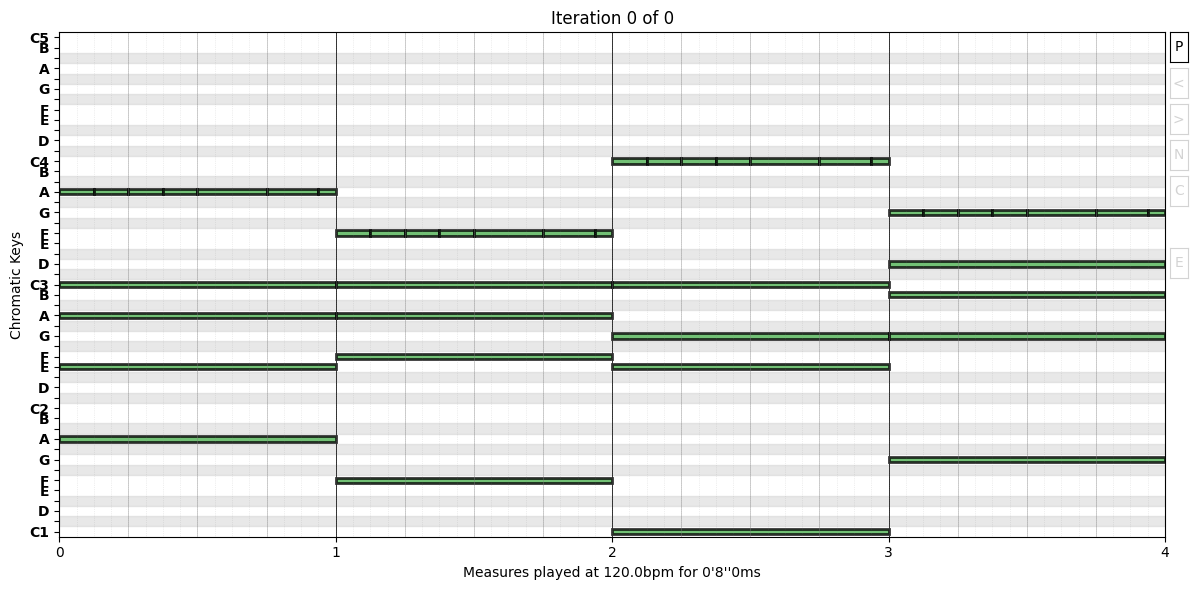

In [16]:
clip_togehter + framed_melody >> Plot()

## Developing melody with a Mask

In [17]:
# The operator // Length splits each Clip Element by the given Length amount
masked_melody = clip_melody // Length(4)

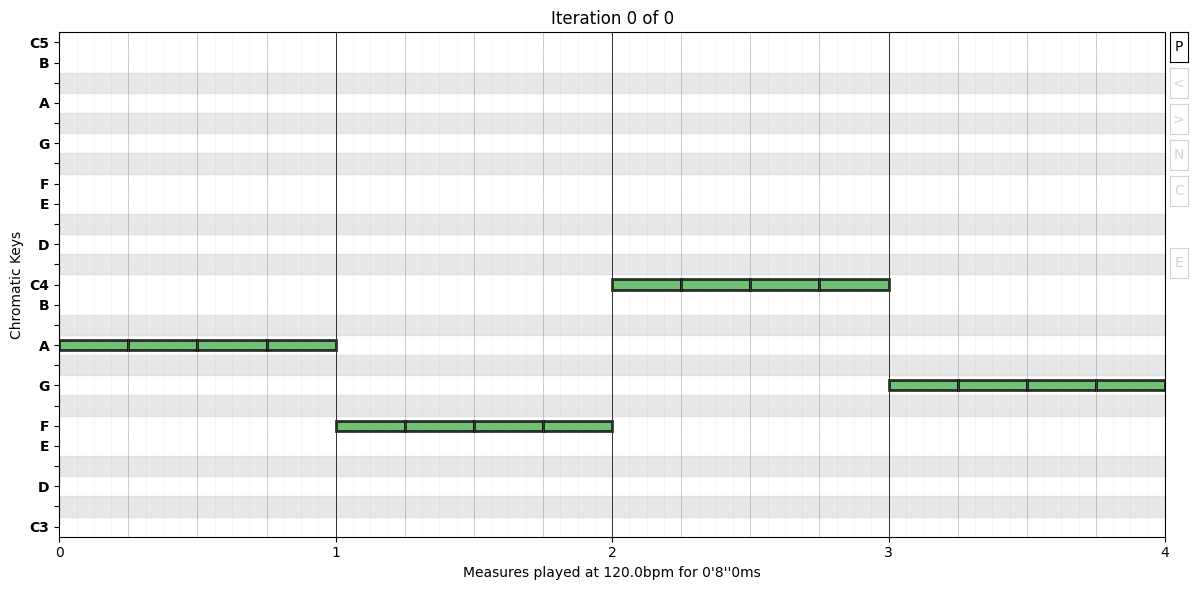

In [18]:
masked_melody >> Plot()

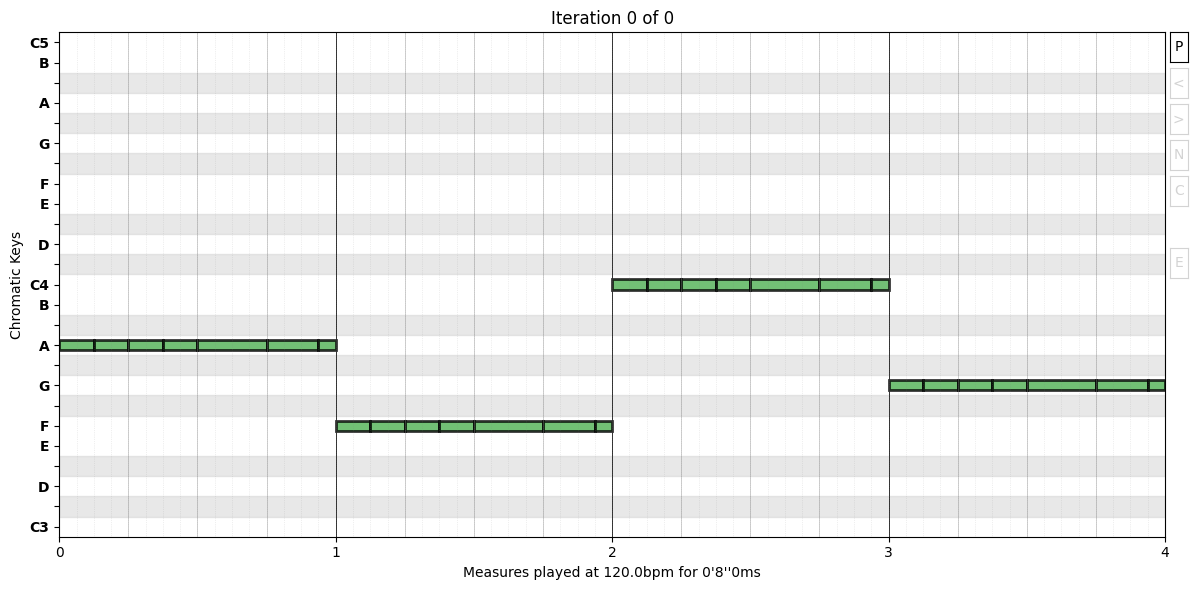

In [19]:
# Masks can't be copied, so, all operators are equivalent to their inline operator
masked_melody.mask(Or(Beat(0), Beat(1))) // Length(2)
masked_melody //= Step(15)
masked_melody >> Plot()

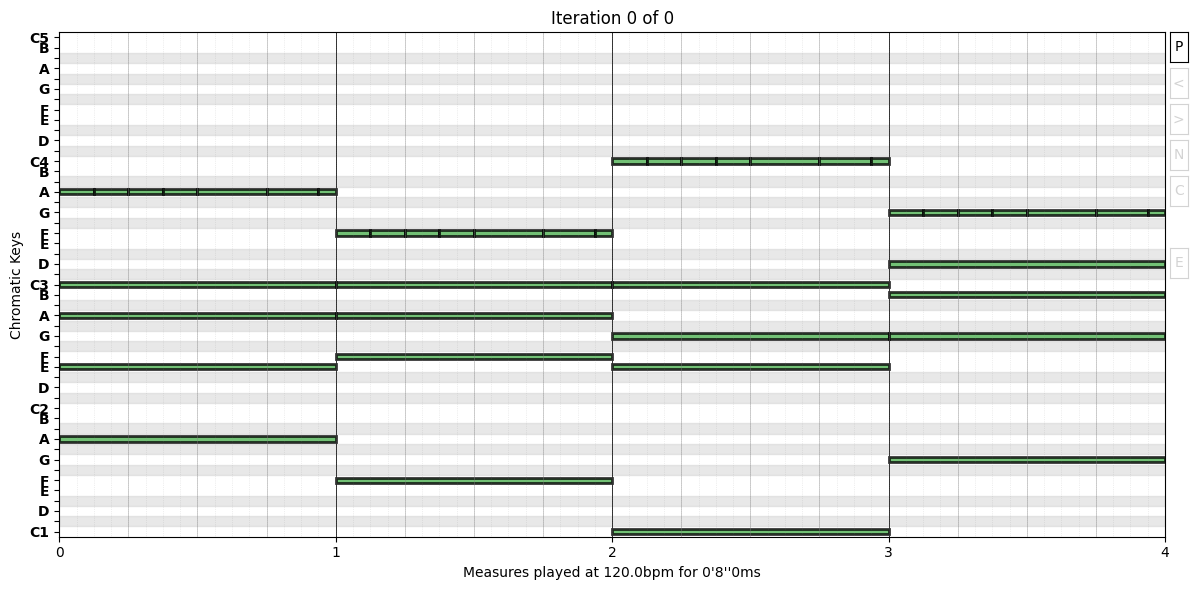

In [20]:
clip_togehter + masked_melody >> Plot()

**The problem with using `// Length` is that if repeated it will split it even more, so it's recursive**

## Using `Duration` instead of `Length` to split each `Element` in a `Clip`

The advantage of using `// Duration` is that if repeated it will **NOT** split it even more, so it's **NOT** recursive

In [21]:
# Starting by creating a copy of clip_melody Clip
duration_melody = ~clip_melody       # ~ does a copy

In [22]:
# Present Staff scale in use
duration_melody % Staff() % str()

''

In [23]:
# It is possible to make adjustments at any point of the workflow and thus became replicated bellow
duration_melody <<= Scale("minor")   # <<= parameter is equivalent to << Pipe(parameter)
# The operator `// Duration` splits each Clip Element by the given `Duration` given to each `Element`
duration_melody //= Duration(1/4)

In [24]:
# Makes sure the Clip scale is indeed "minor"
duration_melody % Staff() % str()

'minor'

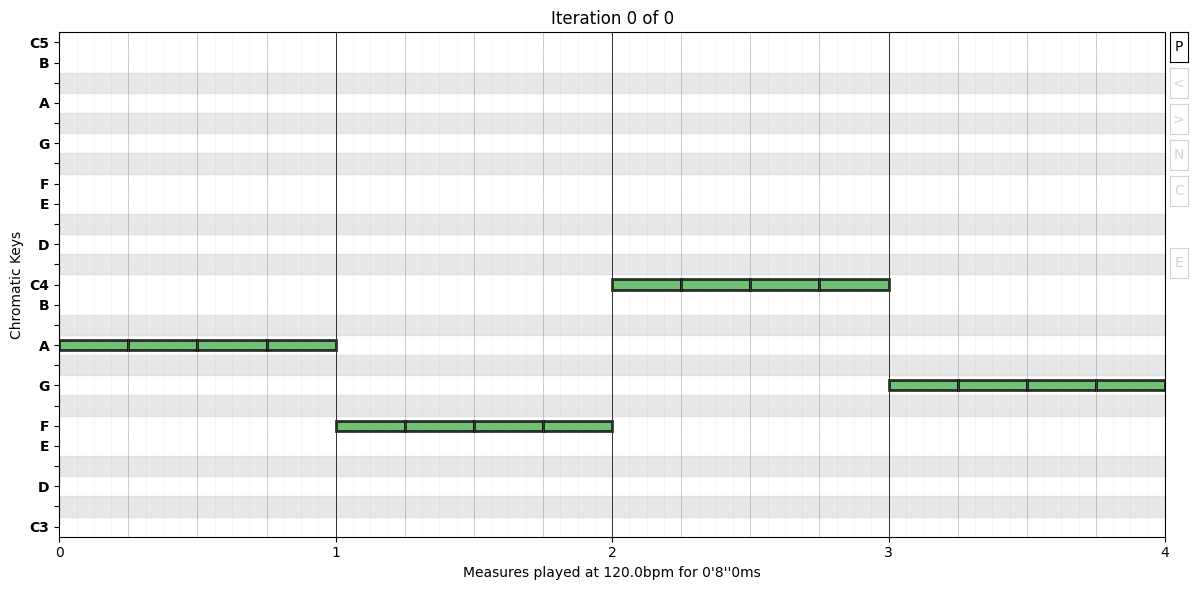

In [25]:
duration_melody >> Plot()

In [26]:
# Check which Key is the first Note
duration_melody[0] % Key() % str()

'A'

In [27]:
# Check the Degree of the first Note
duration_melody[0] % Degree() % str()

'I'

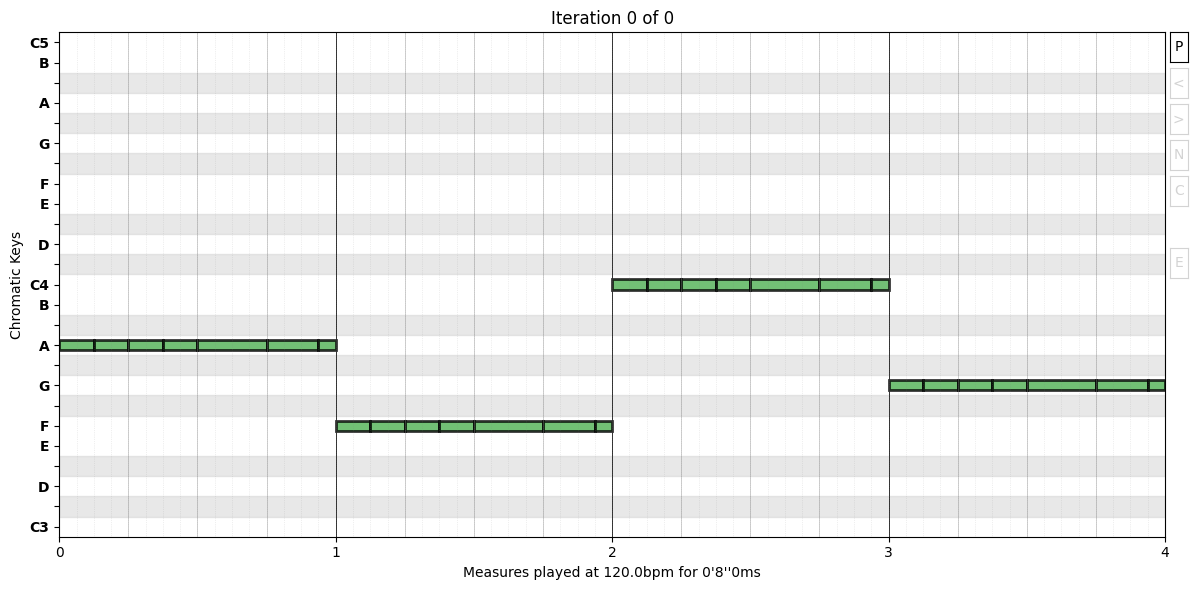

In [28]:
duration_melody //= Less(Beat(2))**Duration(1/8)
duration_melody //= Step(15)
duration_melody >> Plot()

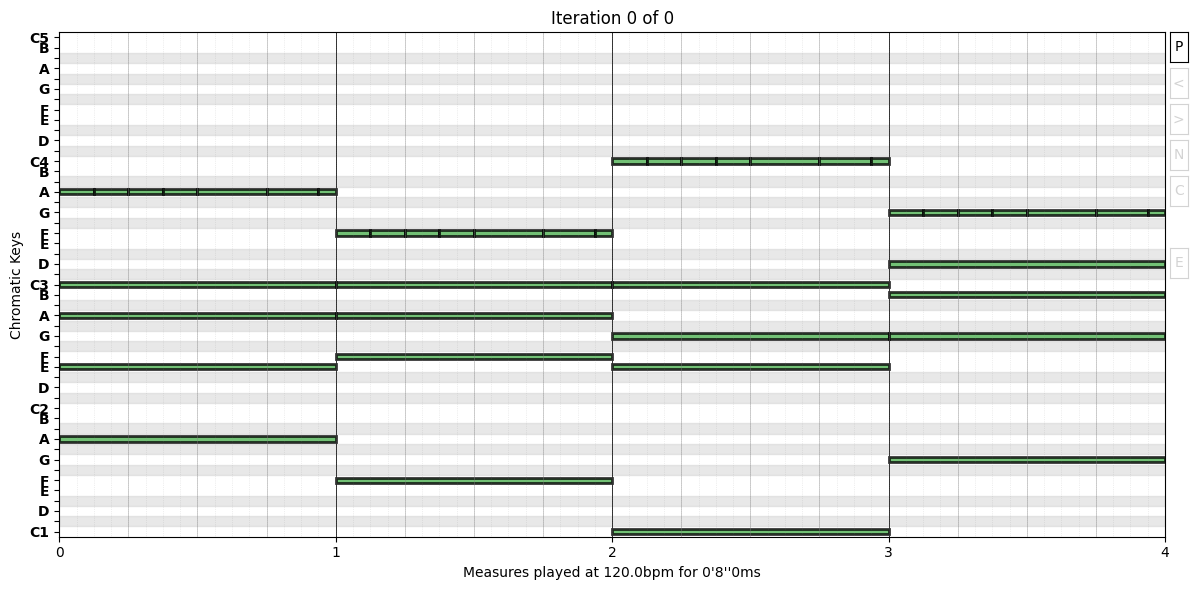

In [29]:
clip_togehter + duration_melody >> Plot()

In [30]:
# Doing `Clip >> Measure(0)` is equivalent to `Clip >> Mask(Measure(0))`
duration_melody >> Measure(0) << Cycle(1, 1, 3, 3, 5)**Degree() << Equal(Beats(3))**Duration(1/8)

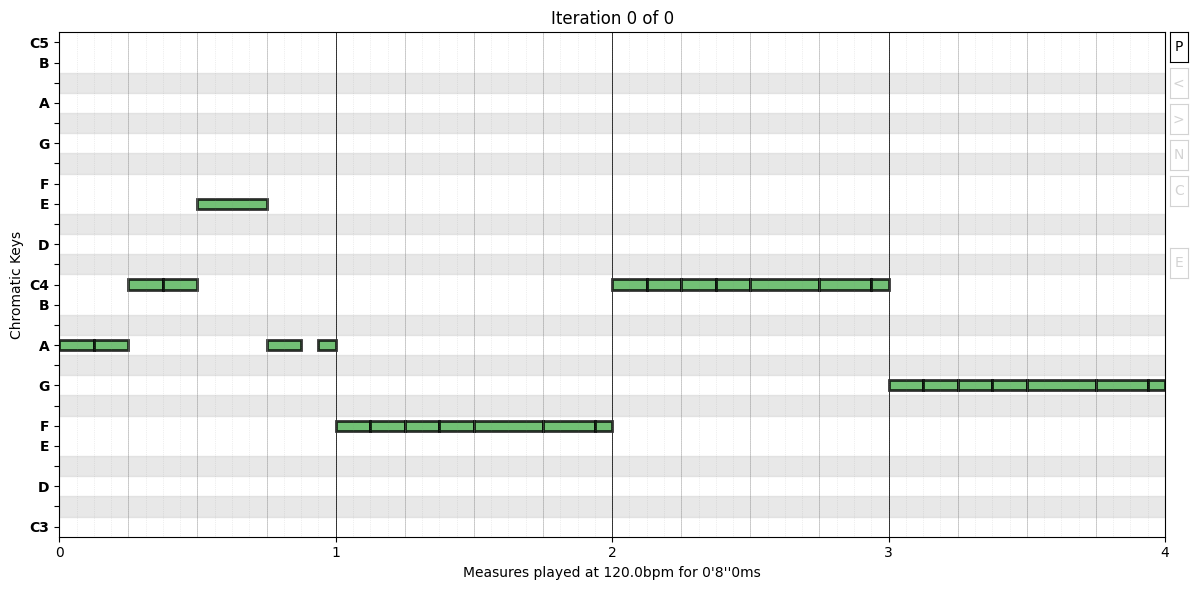

In [31]:
duration_melody >> Plot()

In [32]:
# Check multiple parameters of 3rd Note at once
duration_melody[2] % ((Tonic(), str()), (Root(), str()), (TargetKey(), str()), (Degree(), str()), (Shifting(), int()), (Pitch(), float()))

('A', 'C', 'C', 'iii', 0, 60.0)

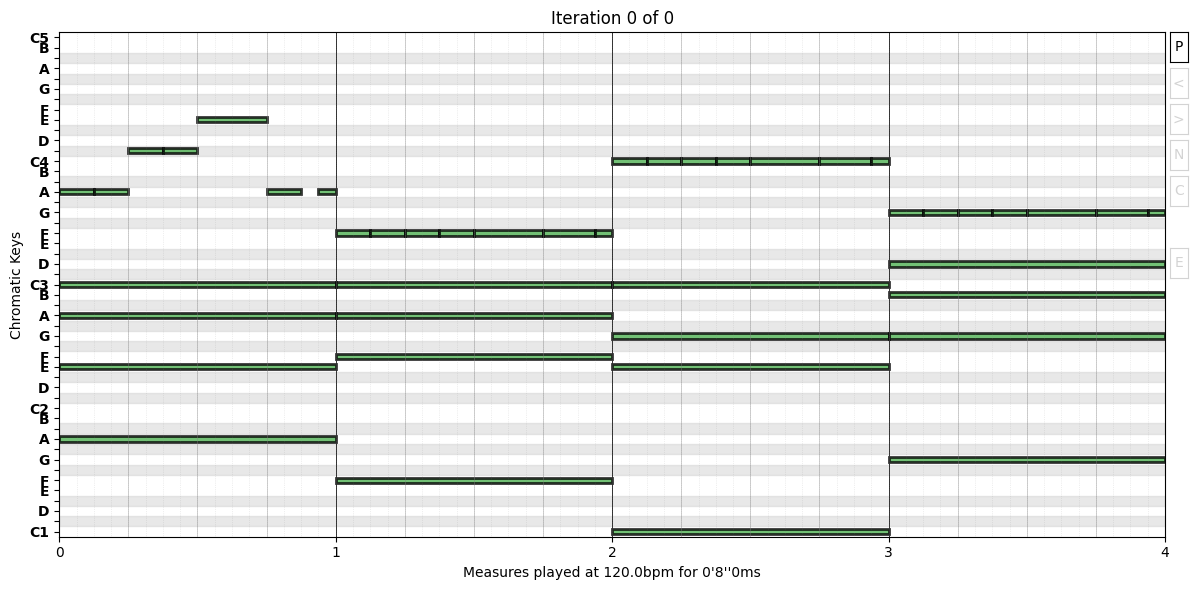

In [33]:
clip_togehter + duration_melody >> Plot()

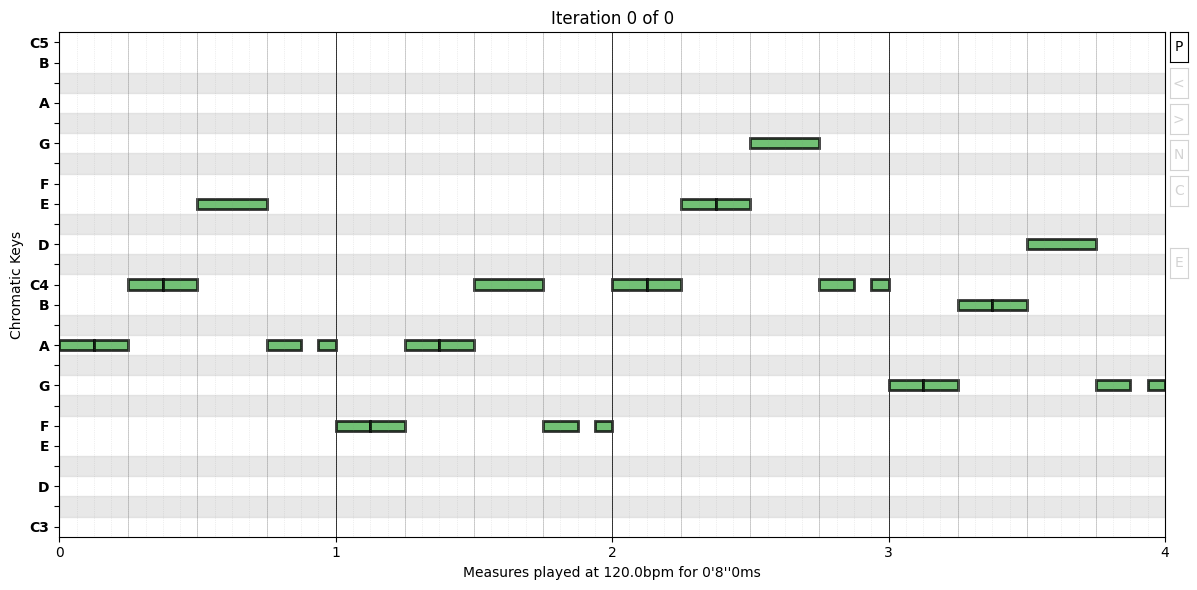

In [34]:
# Resets the Key Signature for a Major C
duration_melody <<= Scale(None)
# Remove all existing Degrees to start all of them at the Tonic
duration_melody << Degree(1)
# Sets a specific scale for each Measure
duration_melody >> Measure(0) << Scale("minor")
duration_melody >> Greater(Measure(0)) << Scale("Major")
# Because Shifting is based on 0 and Degree is based on 1, a Subtract(1) is done in the Frame chain
duration_melody << Foreach(1, 1, 3, 3, 5, 1, 1)**Subtract(1)**Shifting() << Equal(Step(12))**(1/8)
# Prints the result right away
duration_melody >> Plot()

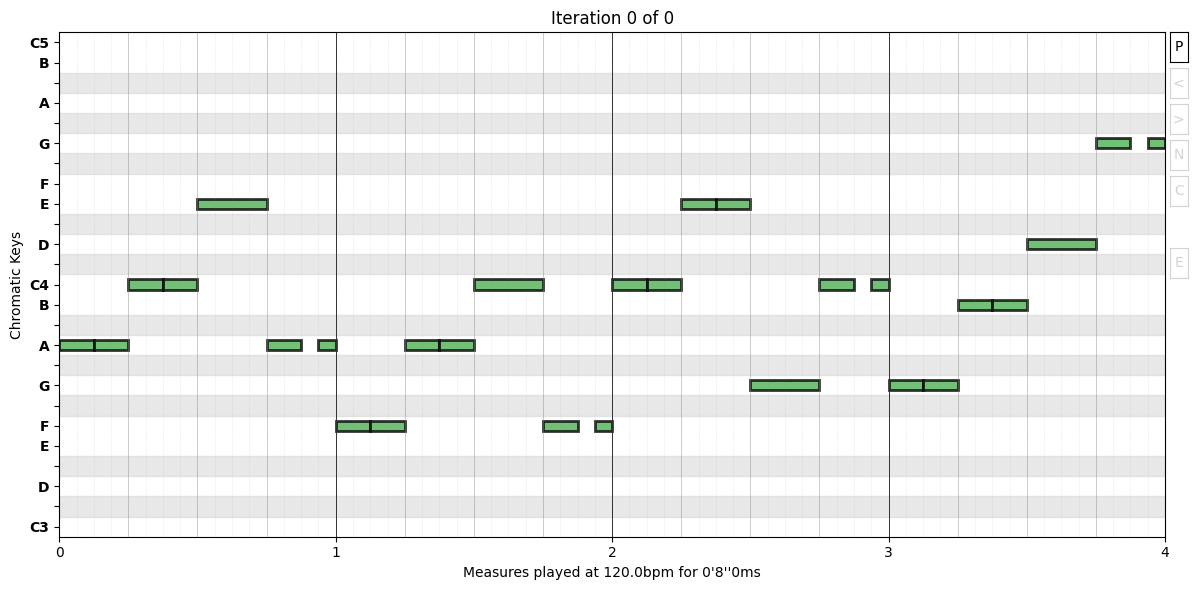

In [35]:
# Readjust Octaves based on the previous output << is better because avoid cyclic repetitions
duration_melody << Equal(Measure(2), Beat(2))**Octave(3) << Equal(Measure(3), Beat(3))**Octave(4)
# Prints the result right away
duration_melody >> Plot()

In [36]:
# Check multiple parameters of 3rd Note at once
duration_melody[2] % ((Tonic(), str()), (Root(), str()), (TargetKey(), str()), (Degree(), str()), (Shifting(), int()), (Pitch(), Scale(), str()))

('A', 'A', 'C', 'I', 2, 'minor')

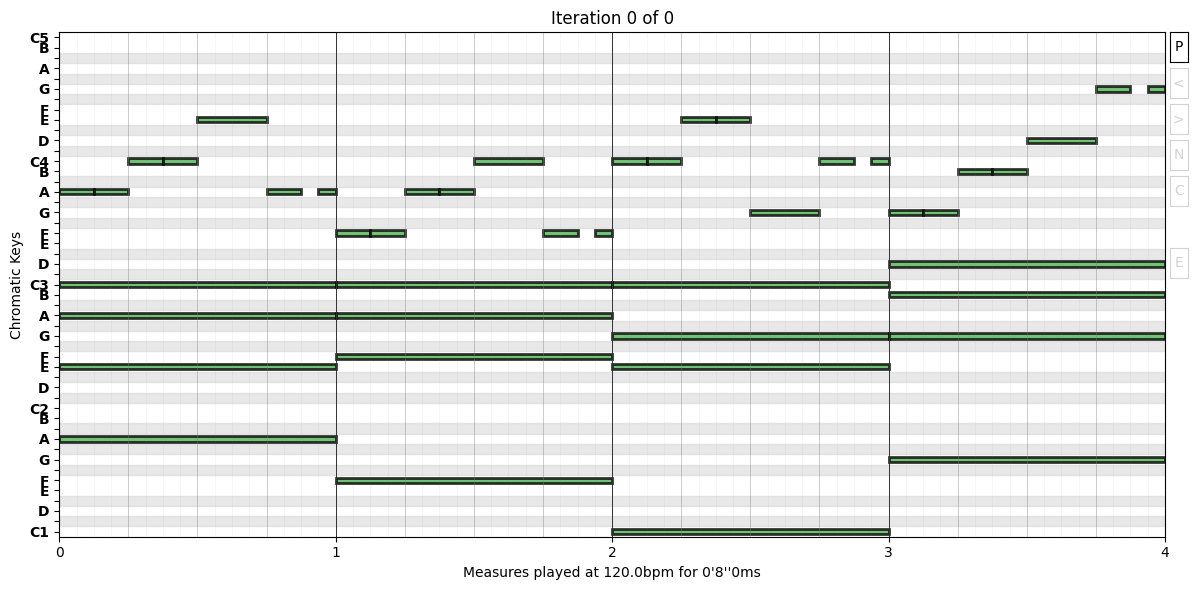

In [37]:
clip_togehter // duration_melody >> Plot()

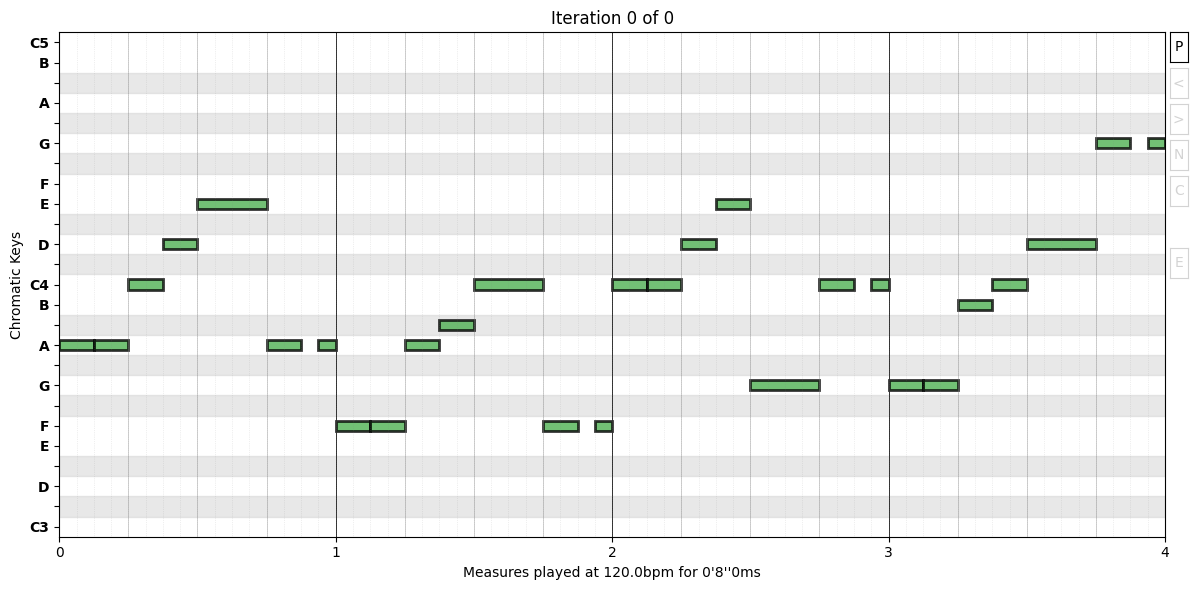

In [38]:
# Working a copy inside a cell avoids recursive operations that result in repeated actions
spiced_melody = ~duration_melody
spiced_melody += NotEqual(Measure(2))**Equal(Step(6))**Modulation(1)
spiced_melody -= Equal(Measure(2))**Equal(Step(4))**Transposition(1)
spiced_melody >> Plot()

In [39]:
# Check multiple parameters of 3rd Note at once
spiced_melody[10] % ((Tonic(), str()), (Root(), str()), (TargetKey(), str()), (Degree(), str()), (Shifting(), int()), (Pitch(), Scale(), str()), (Pitch(), bool()))

('F', 'F', 'A#', 'I', 3, 'Major', 1)

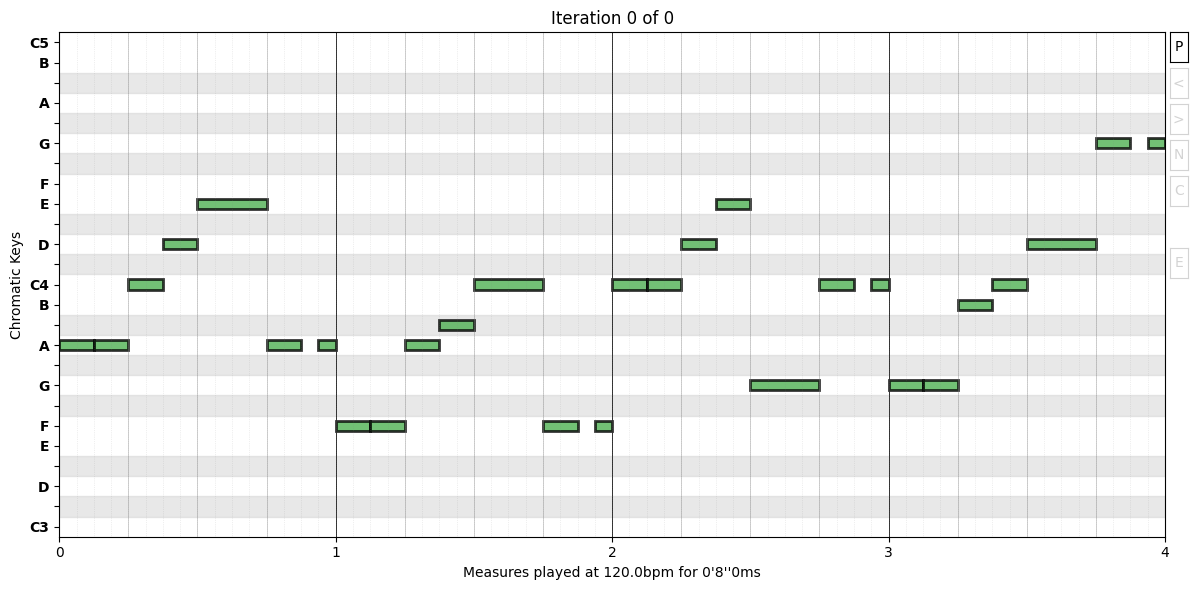

In [40]:
# After making sure the result is the intended on it's time to copy it back to suration melody
duration_melody = spiced_melody * 1
duration_melody >> Plot()

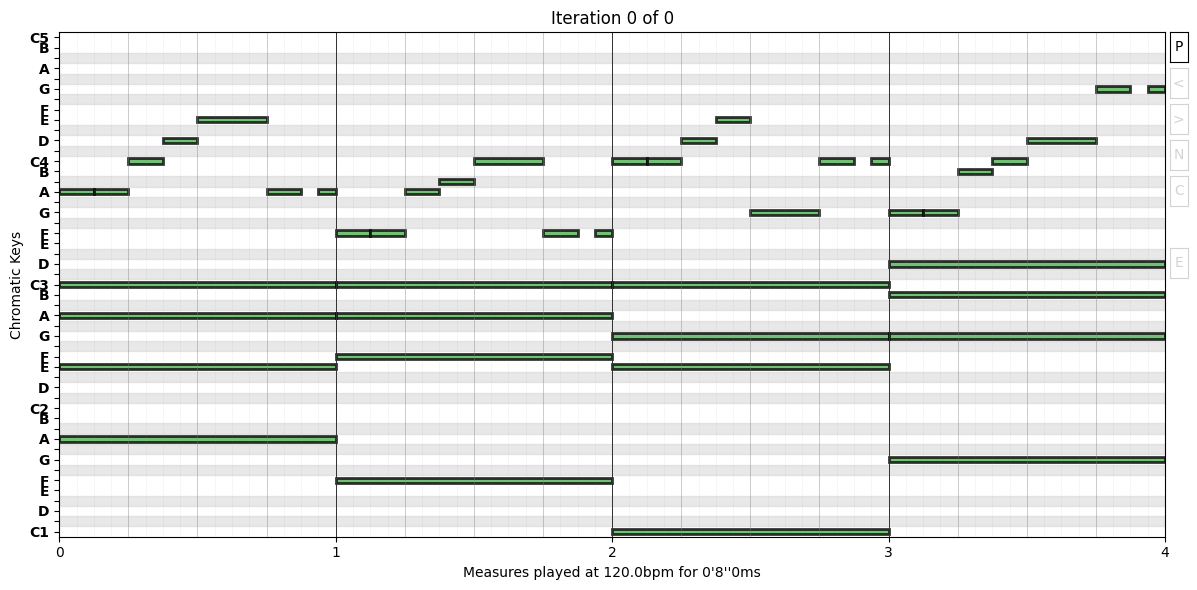

In [41]:
clip_togehter // duration_melody >> Plot()